In [1]:
import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st

import stablerank.srank as sr
import stablerank.geometry_objects_2020 as ge

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import _pickle as pickle

from ripser import ripser
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from PIL import Image

#from keras.datasets import mnist
#from matplotlib import pyplot

### Import Data

In [2]:
# loading the data

df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv', sep=',')
#df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv', sep=',',header=None)

In [3]:
# Removing duplicate values and reindexing

df.drop_duplicates(subset =[" pixels"], inplace = True)
df=df.reindex(range(0,len(df)-1))

## $H_0$ Stable Ranks for Embedding 1

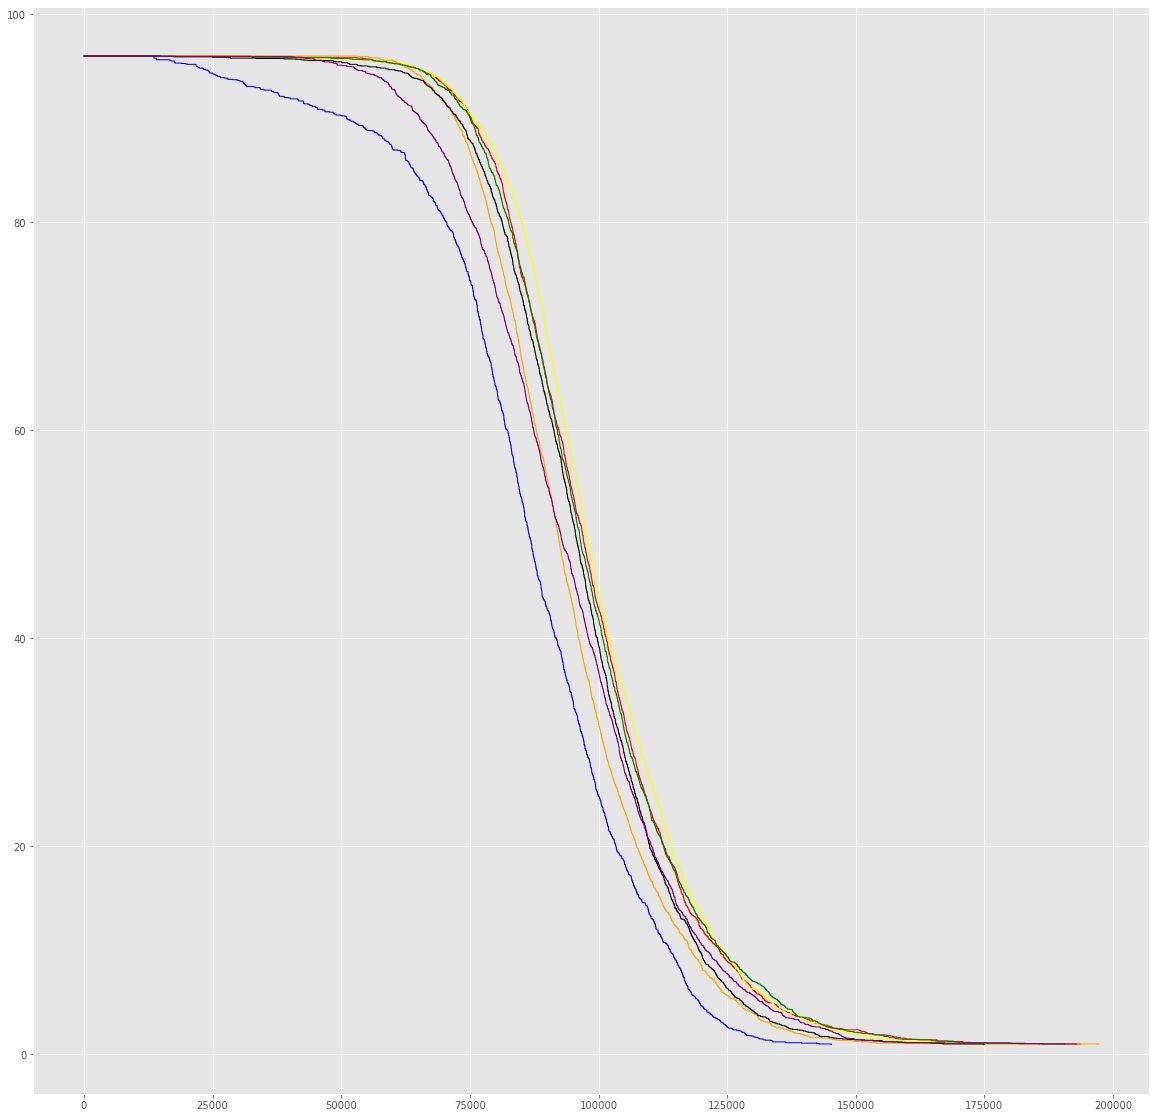

In [6]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_categories = [0,1,2,3,4,5,6]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
colours=["red","blue","yellow","orange","green","black","purple"]

# specifying the number of pictures for subsampling
number_of_pictures = 100 # How many pictures per subsampling
number_of_times = 25 # How often to perform subsampling for each emotion

# specifying metric
metric = "cityblock"
metric_parameter = 100

# specifying clustering method
clustering_method = "single"

plt.figure(figsize=(20,20))

for e in emotion_categories:
    pos = np.array(np.where(df["emotion"]==e))[0]
    rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:number_of_pictures])]

    # Preparing an empty array to convert the pixel vectors from string to float
    points_dummy = np.empty((len(rand_pos),48*48), int)

    for i in range(0,len(rand_pos)):
        points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

    # Create the point cloud
    points = np.vstack(points_dummy)
    point_cloud = sr.EucObject(points)

    # Add the pcf to the overall pcf but weighted to get the overall average in the end
    f_pcf = point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter)*(1/number_of_times)
    
    for k in range(2,number_of_times):
        # Subsampling the positions
        pos = np.array(np.where(df["emotion"]==e))[0]
        rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:number_of_pictures])]

        # Preparing an empty array to convert the pixel vectors from string to float
        points_dummy = np.empty((len(rand_pos),48*48), int)

        for i in range(0,len(rand_pos)):
            points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

        # Create the point cloud
        points = np.vstack(points_dummy)
        point_cloud = sr.EucObject(points)

        # Add the pcf to the overall pcf but weighted to get the overall average in the end
        f_pcf = f_pcf + point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter)*(1/number_of_times)
    
    # plot the average pcf
    f_pcf.plot(color=colours[emotion_categories.index(e)])

    #print("size: ", point_cloud.size)
    #print("dimension: ", point_cloud.dim)
    #print("points: ", point_cloud.points)

## Homology for Embedding 1

### Barcodes

##### Trying out different metrics

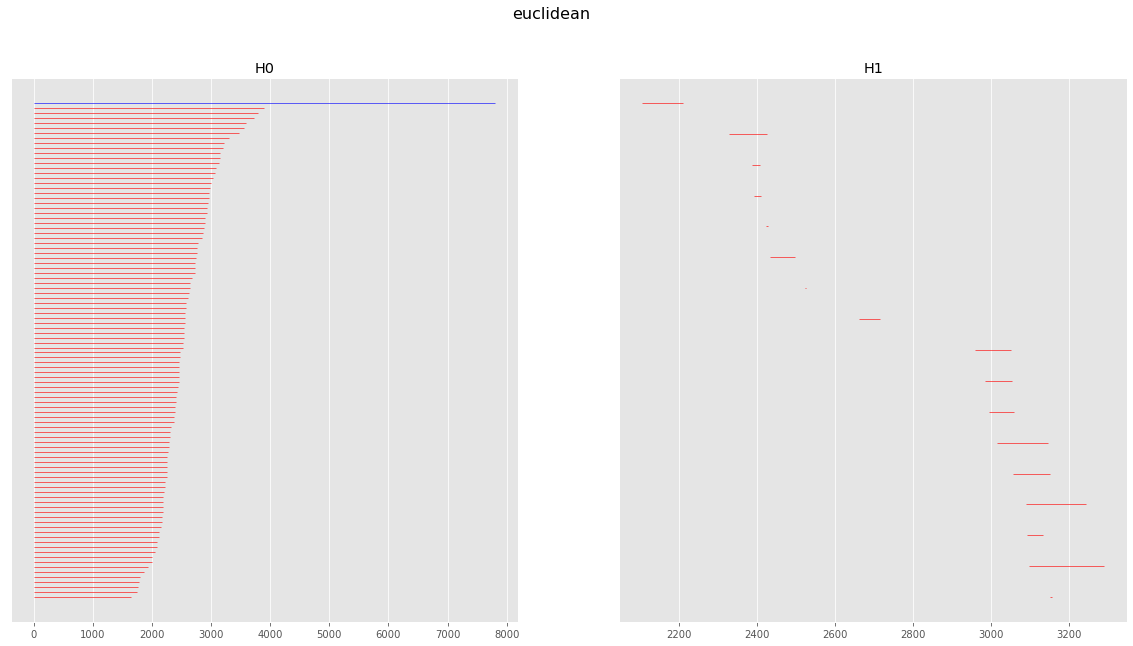

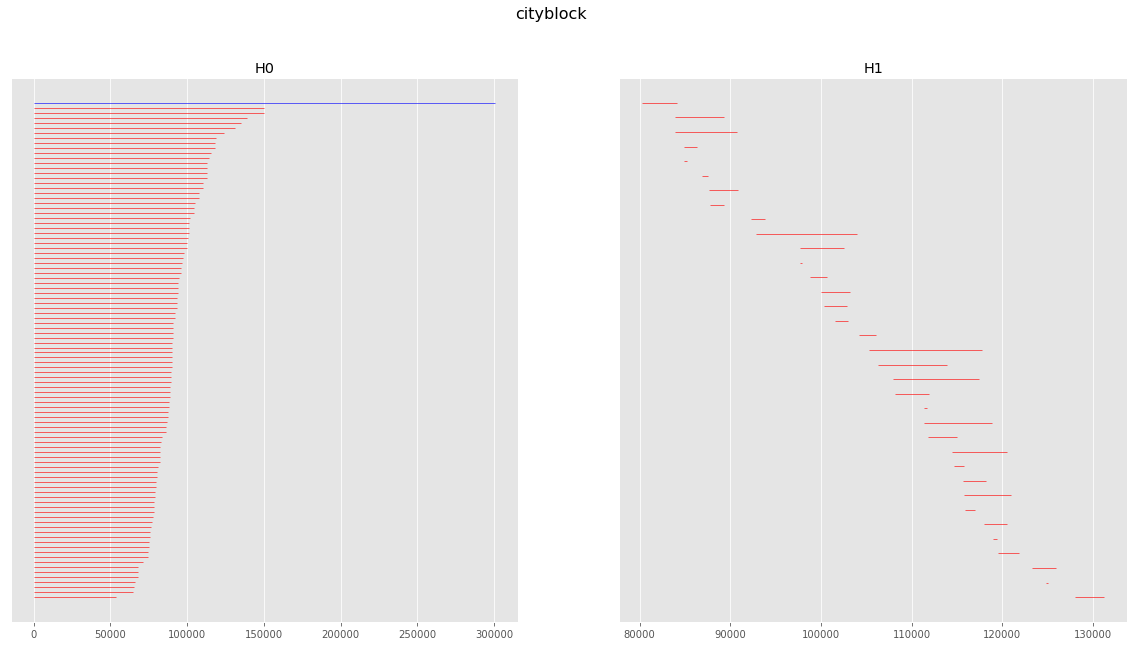

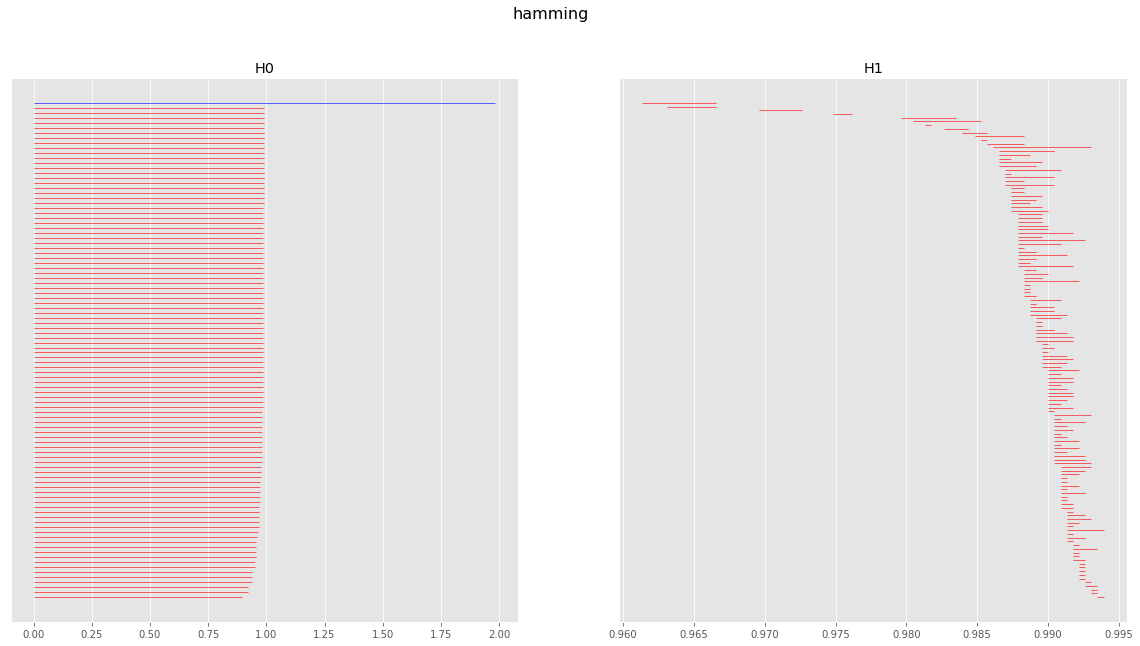

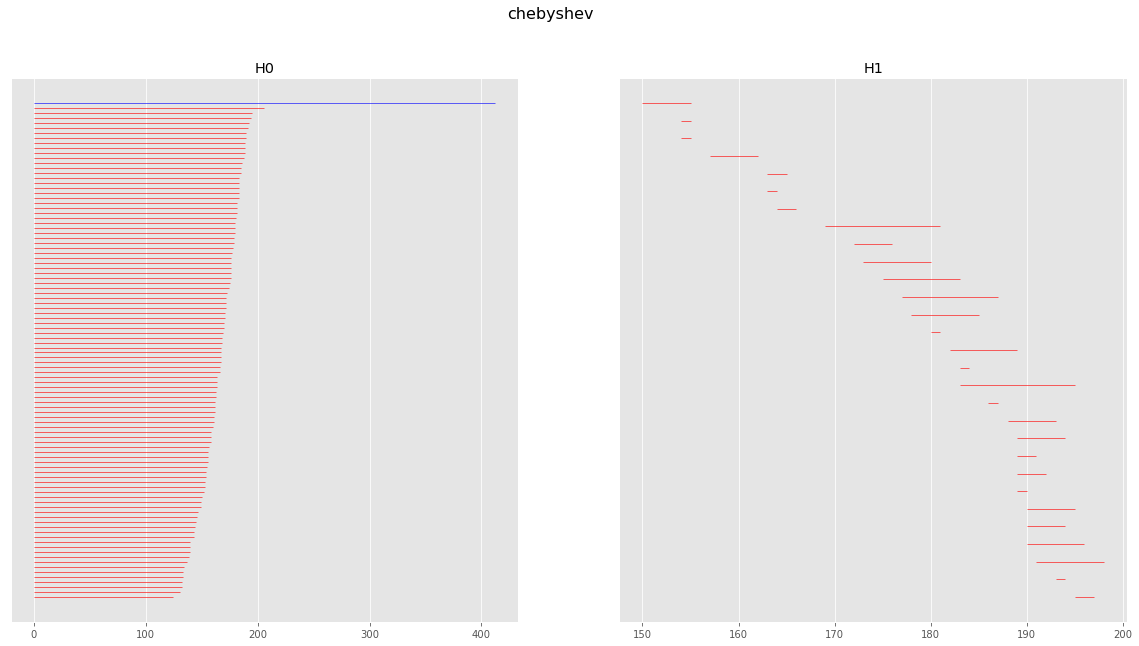

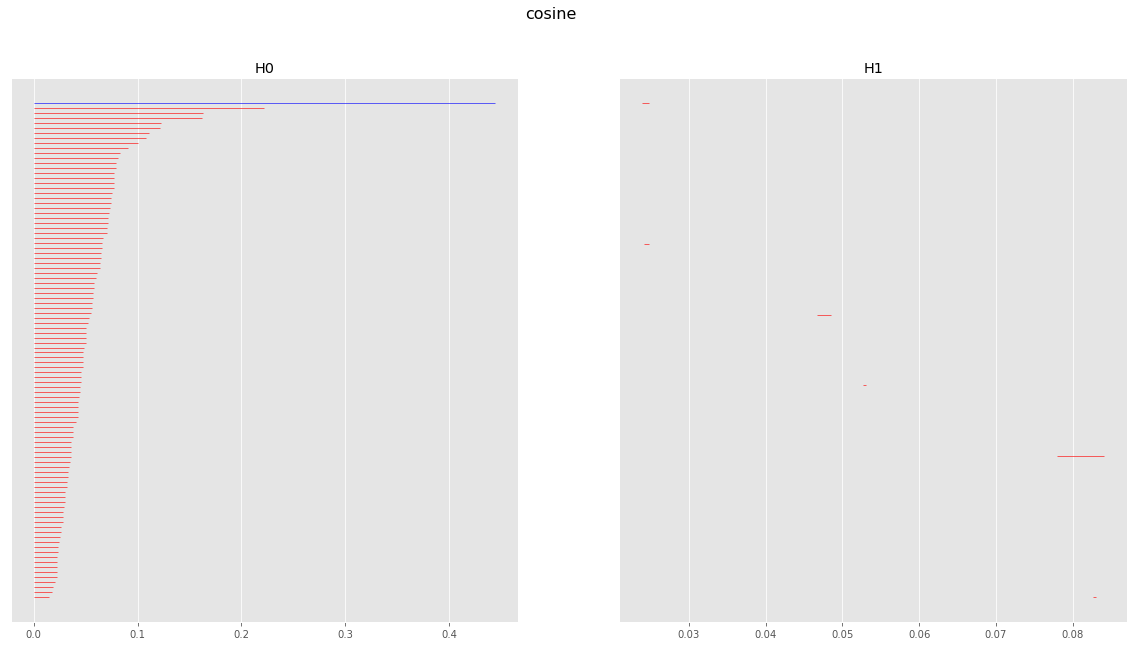

In [48]:
metrics = ["euclidean", "cityblock", "hamming", "chebyshev", "cosine"]
#metrics = ["cityblock"]

pos = np.array(np.where(df["emotion"]==5))[0]
rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:100])]
points_dummy = np.empty((len(rand_pos),48*48), int)

for i in range(0,len(rand_pos)):
    points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

points = np.vstack(points_dummy)
em = sr.EucObject(points)


D ={}
for m in metrics:
    D[m] = em.get_distance(metric = m)

maxdim = 3
coeff = 2
for m in metrics:
    bc = D[m].get_bc(maxdim = maxdim, coeff = coeff)
    fig=plt.figure(m, figsize = (20,10))
    fig.suptitle(m, fontsize=16)
    ax=plt.subplot(1,2,1)
    ax.set_title("H0")
    bc["H0"].plot()
    ax=plt.subplot(1,2,2)
    ax.set_title("H1")
    bc["H1"].plot()
    #ax=plt.subplot(1,2,1)
    #ax.set_title("H2")
    #bc["H2"].plot()
    #ax=plt.subplot(1,2,2)
    #ax.set_title("H3")
    #bc["H3"].plot()

##### Comparing the different emotions

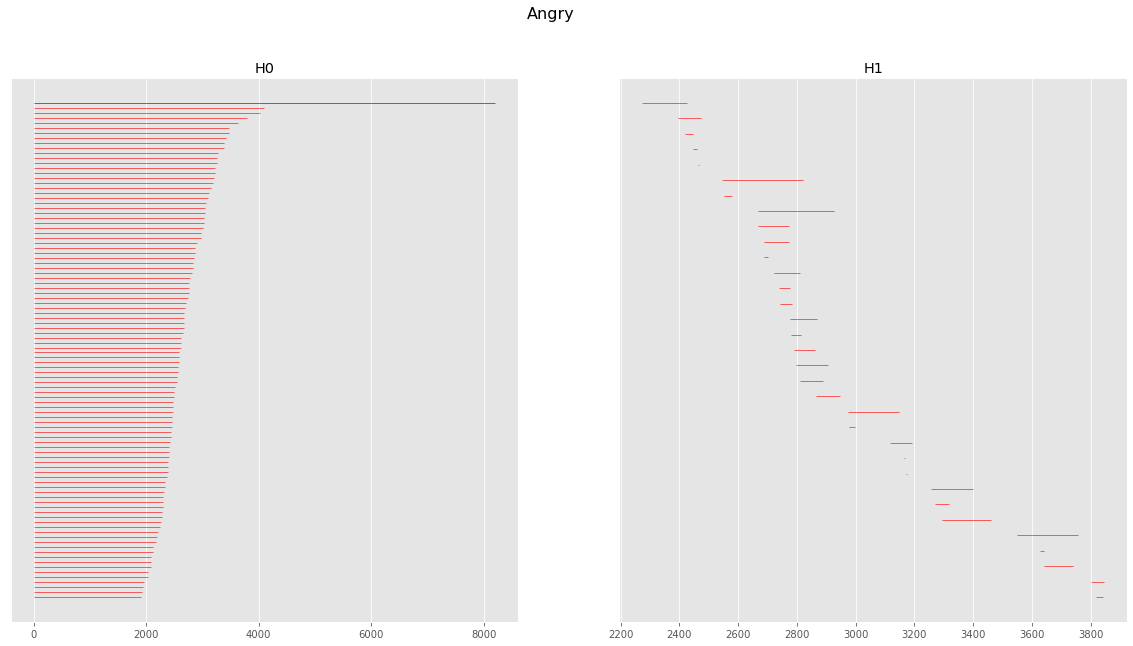

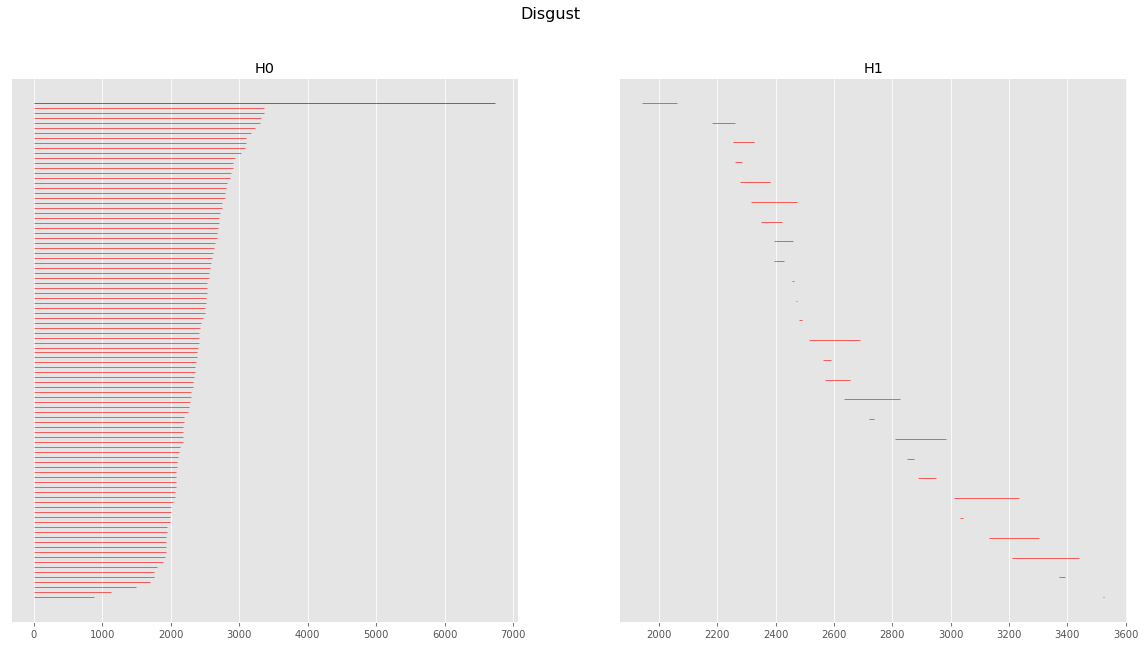

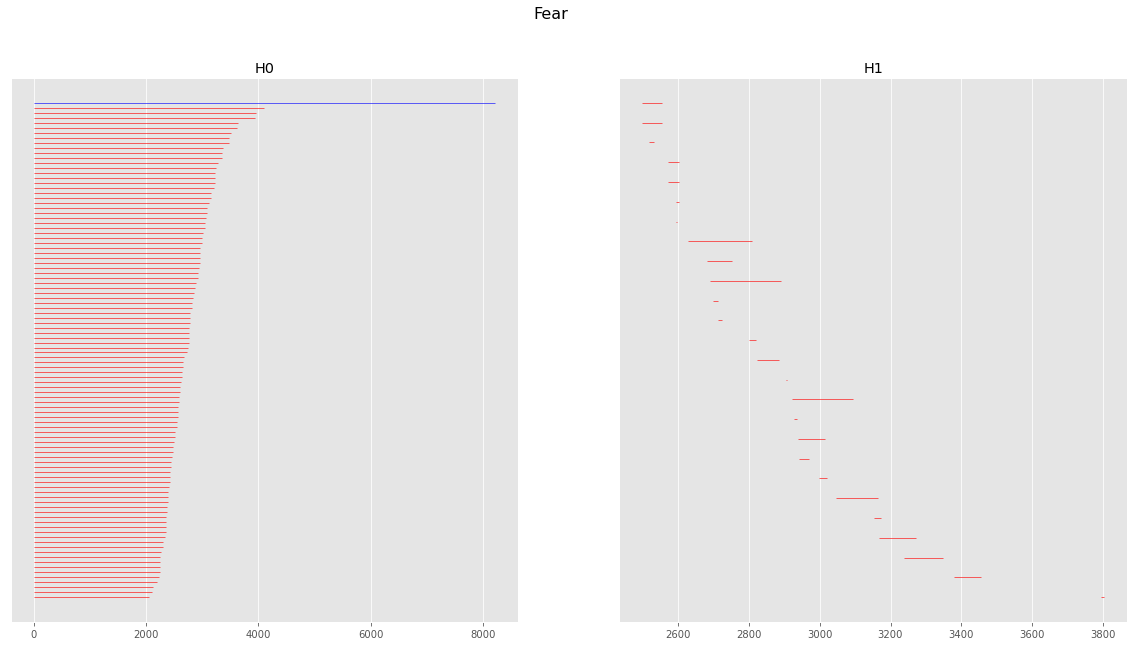

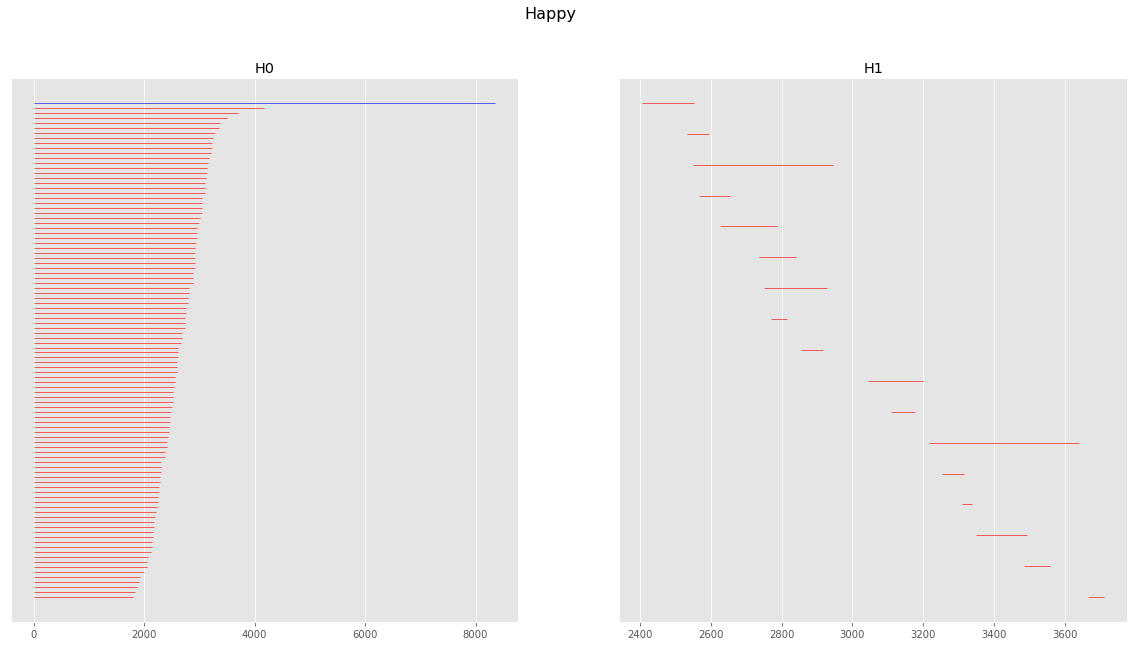

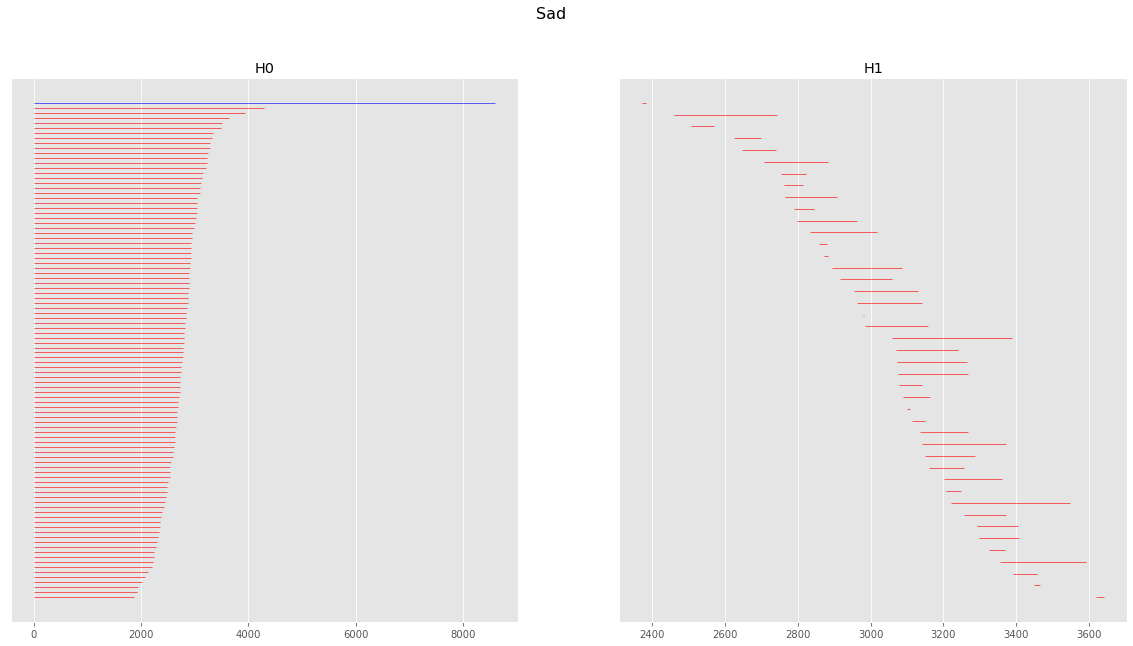

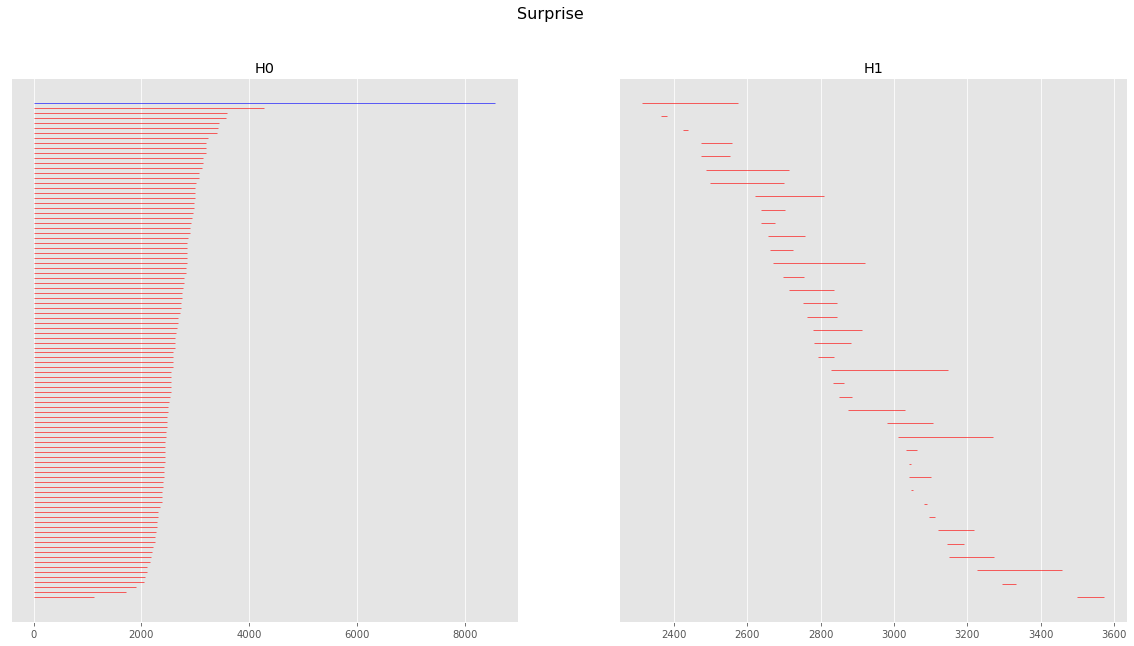

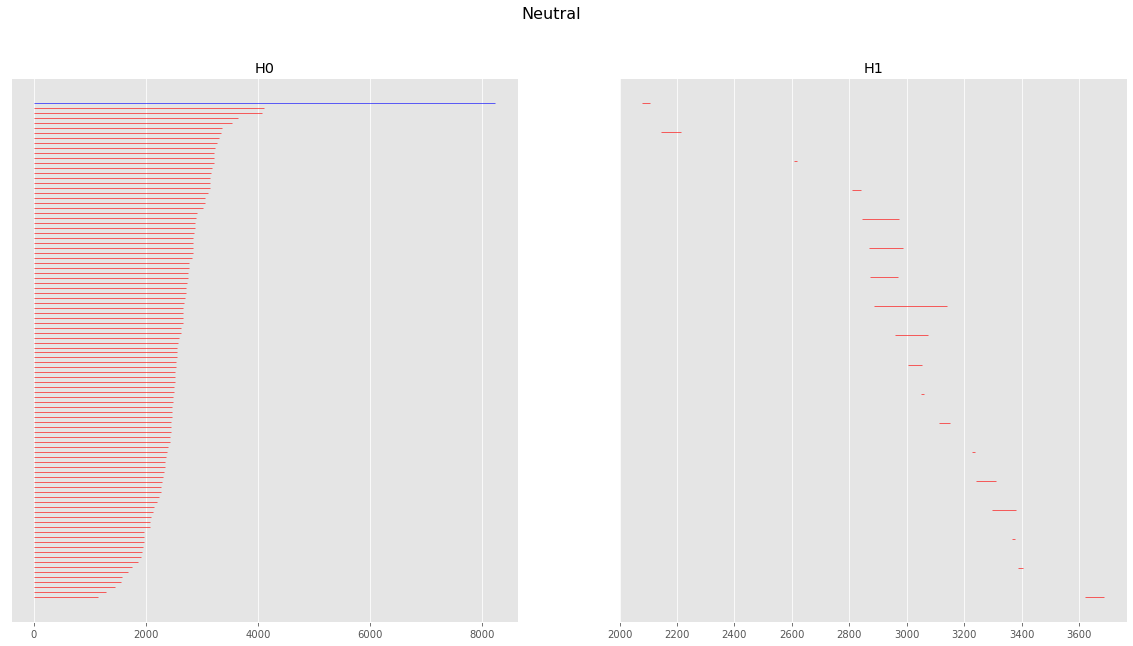

In [54]:
metrics = ["euclidean"]
#metrics = ["cityblock"]
for e in emotion_categories:
    pos = np.array(np.where(df["emotion"]==e))[0]
    rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:100])]
    points_dummy = np.empty((len(rand_pos),48*48), int)

    for i in range(0,len(rand_pos)):
        points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

    points = np.vstack(points_dummy)
    em = sr.EucObject(points)


    D ={}
    for m in metrics:
        D[m] = em.get_distance(metric = m)

    maxdim = 3
    coeff = 2

    bc = D[m].get_bc(maxdim = maxdim, coeff = coeff)
    fig=plt.figure(emotion_names[e], figsize = (20,10))
    fig.suptitle(emotion_names[e], fontsize=16)
    ax=plt.subplot(1,2,1)
    ax.set_title("H0")
    bc["H0"].plot()
    ax=plt.subplot(1,2,2)
    ax.set_title("H1")
    bc["H1"].plot()

### Stable ranks for higher homologies

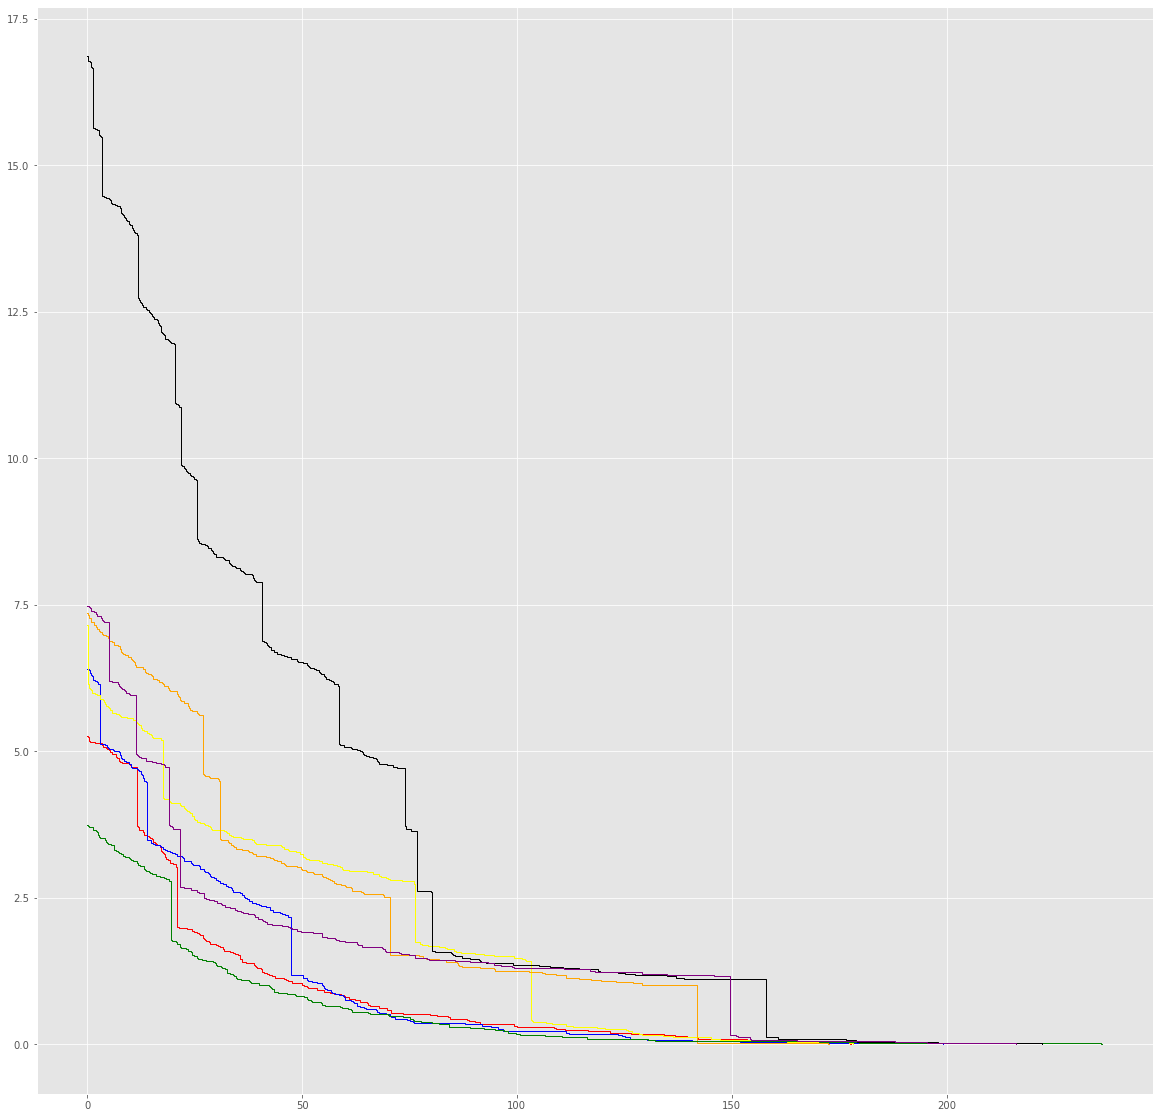

In [14]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_categories = [0,1,2,3,4,5,6]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
colours=["red","blue","yellow","orange","green","black","purple"]

# specifying which homology
degree="H2"
md=2

# specifying the number of pictures for subsampling
number_of_pictures = 100 # How many pictures per subsampling
number_of_times = 50 # How often to perform subsampling for each emotion

# specifying metric
metric = "euclidean"
metric_parameter = 3

# specifying clustering method
clustering_method = "single"

plt.figure(figsize=(20,20))

for e in emotion_categories:
    pos = np.array(np.where(df["emotion"]==e))[0]
    rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:number_of_pictures])]

    # Preparing an empty array to convert the pixel vectors from string to float
    points_dummy = np.empty((len(rand_pos),48*48), int)

    for i in range(0,len(rand_pos)):
        points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

    # Create the point cloud
    points = np.vstack(points_dummy)
    point_cloud = sr.EucObject(points)

    # Add the pcf to the overall pcf but weighted to get the overall average in the end
    b = point_cloud.get_bc(maxdim=md)
    f_pcf = sr.bc_to_sr(b, degree)
    
    for k in range(2,number_of_times):
        # Subsampling the positions
        pos = np.array(np.where(df["emotion"]==e))[0]
        rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:number_of_pictures])]

        # Preparing an empty array to convert the pixel vectors from string to float
        points_dummy = np.empty((len(rand_pos),48*48), int)

        for i in range(0,len(rand_pos)):
            points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

        # Create the point cloud
        points = np.vstack(points_dummy)
        point_cloud = sr.EucObject(points)

        # Add the pcf to the overall pcf but weighted to get the overall average in the end
        b = point_cloud.get_bc(maxdim=md)
        f_pcf = f_pcf + sr.bc_to_sr(b, degree)*(1/number_of_times)
    
    # plot the average pcf
    f_pcf.plot(color=colours[emotion_categories.index(e)])

    #print("size: ", point_cloud.size)
    #print("dimension: ", point_cloud.dim)
    #print("points: ", point_cloud.points)

### Try out area

In [391]:
#Schmierblatt

pos = np.array(np.where(df["emotion"]==3))[0]
rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:20])]
points_dummy = np.empty((len(rand_pos),48*48), int)

for i in range(0,len(rand_pos)):
    points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

#points = np.vstack(points_dummy)
#df[" pixels"].loc[pos]

In [392]:
angry = sr.EucObject(points)
print("size: ", angry.size)
print("dimension: ", angry.dim)
print("points: ", angry.points)

size:  20
dimension:  2304
points:  [[ 16.  14.  15. ... 136. 111. 129.]
 [254. 252. 254. ...  15.  22.  29.]
 [ 52.  61.  60. ...  49.  43.  43.]
 ...
 [ 88.  93.  94. ...  94.  92.  95.]
 [158. 189. 198. ... 173. 153. 135.]
 [ 78.  52.  45. ...  60.  28.  38.]]


In [413]:
# specifying metric
metric = "minkowski"
metric_parameter = 3

# specifying clustering method
clustering_method = "complete"


f1 = angry.get_h0sr(metric = metric, metric_parameter = metric_parameter)


#plt.figure(figsize=(20,20))

#f1.plot(color ="blue")

AttributeError: 'Pcnif' object has no attribute 'save'

In [14]:
sr.Pcf(np.array([]))